In [1]:
import numpy as np
import matplotlib.pyplot as plt
from os import system
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.datasets import make_blobs, make_classification
from sklearn.model_selection import StratifiedShuffleSplit

In [2]:
X, y = make_blobs(n_samples = 1000, centers = 3, n_features = 2, random_state = 40)

In [3]:
spliter = StratifiedShuffleSplit(n_splits = 5, test_size = 0.4)

for train_index, test_index in spliter.split(X, y):
    strat_train_x = X[train_index]
    strat_train_y = y[train_index]
    strat_test_x = X[test_index]
    strat_test_y = y[test_index]

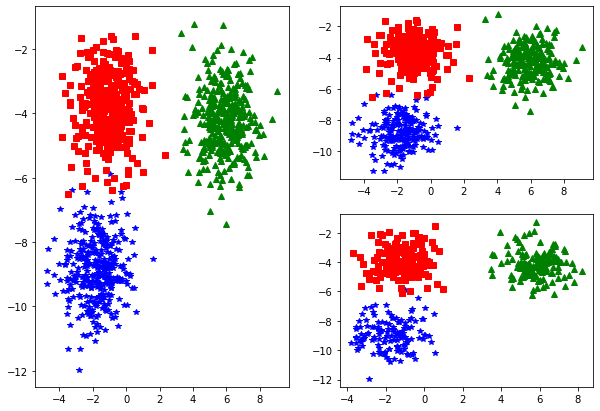

In [4]:
fig = plt.figure(figsize = (10, 7))

axs1 = fig.add_subplot(1, 2, 1)
axs1.plot(X[y == 0, 0], X[y == 0, 1], 'b*')
axs1.plot(X[y == 1, 0], X[y == 1, 1], 'g^')
axs1.plot(X[y == 2, 0], X[y == 2, 1], 'rs')

axs2 = fig.add_subplot(2, 2, 2)
axs2.plot(strat_train_x[strat_train_y == 0, 0], strat_train_x[strat_train_y == 0, 1], 'b*')
axs2.plot(strat_train_x[strat_train_y == 1, 0], strat_train_x[strat_train_y == 1, 1], 'g^')
axs2.plot(strat_train_x[strat_train_y == 2, 0], strat_train_x[strat_train_y == 2, 1], 'rs')

axs3 = fig.add_subplot(2, 2, 4)
axs3.plot(strat_test_x[strat_test_y == 0, 0], strat_test_x[strat_test_y == 0, 1], 'b*')
axs3.plot(strat_test_x[strat_test_y == 1, 0], strat_test_x[strat_test_y == 1, 1], 'g^')
axs3.plot(strat_test_x[strat_test_y == 2, 0], strat_test_x[strat_test_y == 2, 1], 'rs')

In [5]:
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [6]:
export_graphviz(
    tree_clf,
    out_file = 'temp.dot',
    feature_names = ['x1', 'x2'],
    class_names = ['c1', 'c2', 'c3'],
    rounded = True,
    filled = True
)

In [7]:
system('dot -Tpng temp.dot -o temp.png')

0

<img src = 'temp.png'>

Text(6, -7, 'class C')

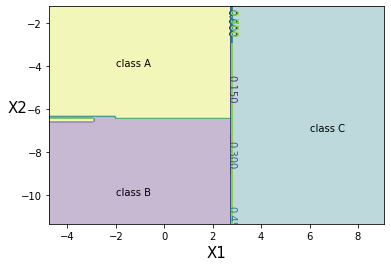

In [8]:
x0, x1 = np.meshgrid(
    np.linspace(strat_train_x[:, 0].min(), strat_train_x[:, 0].max(), 200),
    np.linspace(strat_train_x[:, 1].min(), strat_train_x[:, 1].max(), 200)
)

X_new = np.c_[x0.ravel(), x1.ravel()]

y_pred = tree_clf.predict(X_new).reshape(x0.shape)
y_prob = tree_clf.predict_proba(X_new)[:, 1].reshape(x0.shape)

plt.contourf(x0, x1, y_pred, alpha = 0.3)
contour = plt.contour(x0, x1, y_prob)

plt.clabel(contour, inline = True)
plt.xlabel('X1', fontsize = 15, rotation = 0)
plt.ylabel('X2', fontsize = 15, rotation = 0)

plt.text(-2, -4, 'class A')
plt.text(-2, -10, 'class B')
plt.text(6, -7, 'class C')

In [9]:
from sklearn.datasets import make_moons
from sklearn.model_selection import GridSearchCV

In [10]:
Xm, ym = make_moons(n_samples = 100, noise = 0.2, random_state = 42)

In [44]:
def plot_decision_boundary(axs, clf_model):
    x0, x1 = np.meshgrid(
        np.linspace(Xm[:, 0].min(), Xm[:, 0].max()),
        np.linspace(Xm[:, 1].min(), Xm[:, 1].max())
    )
    
    X_new = np.c_[x0.ravel(), x1.ravel()]
    
    y_pred = clf_model.predict(X_new).reshape(x0.shape)
    
    axs.contourf(x0, x1, y_pred, alpha = 0.3)

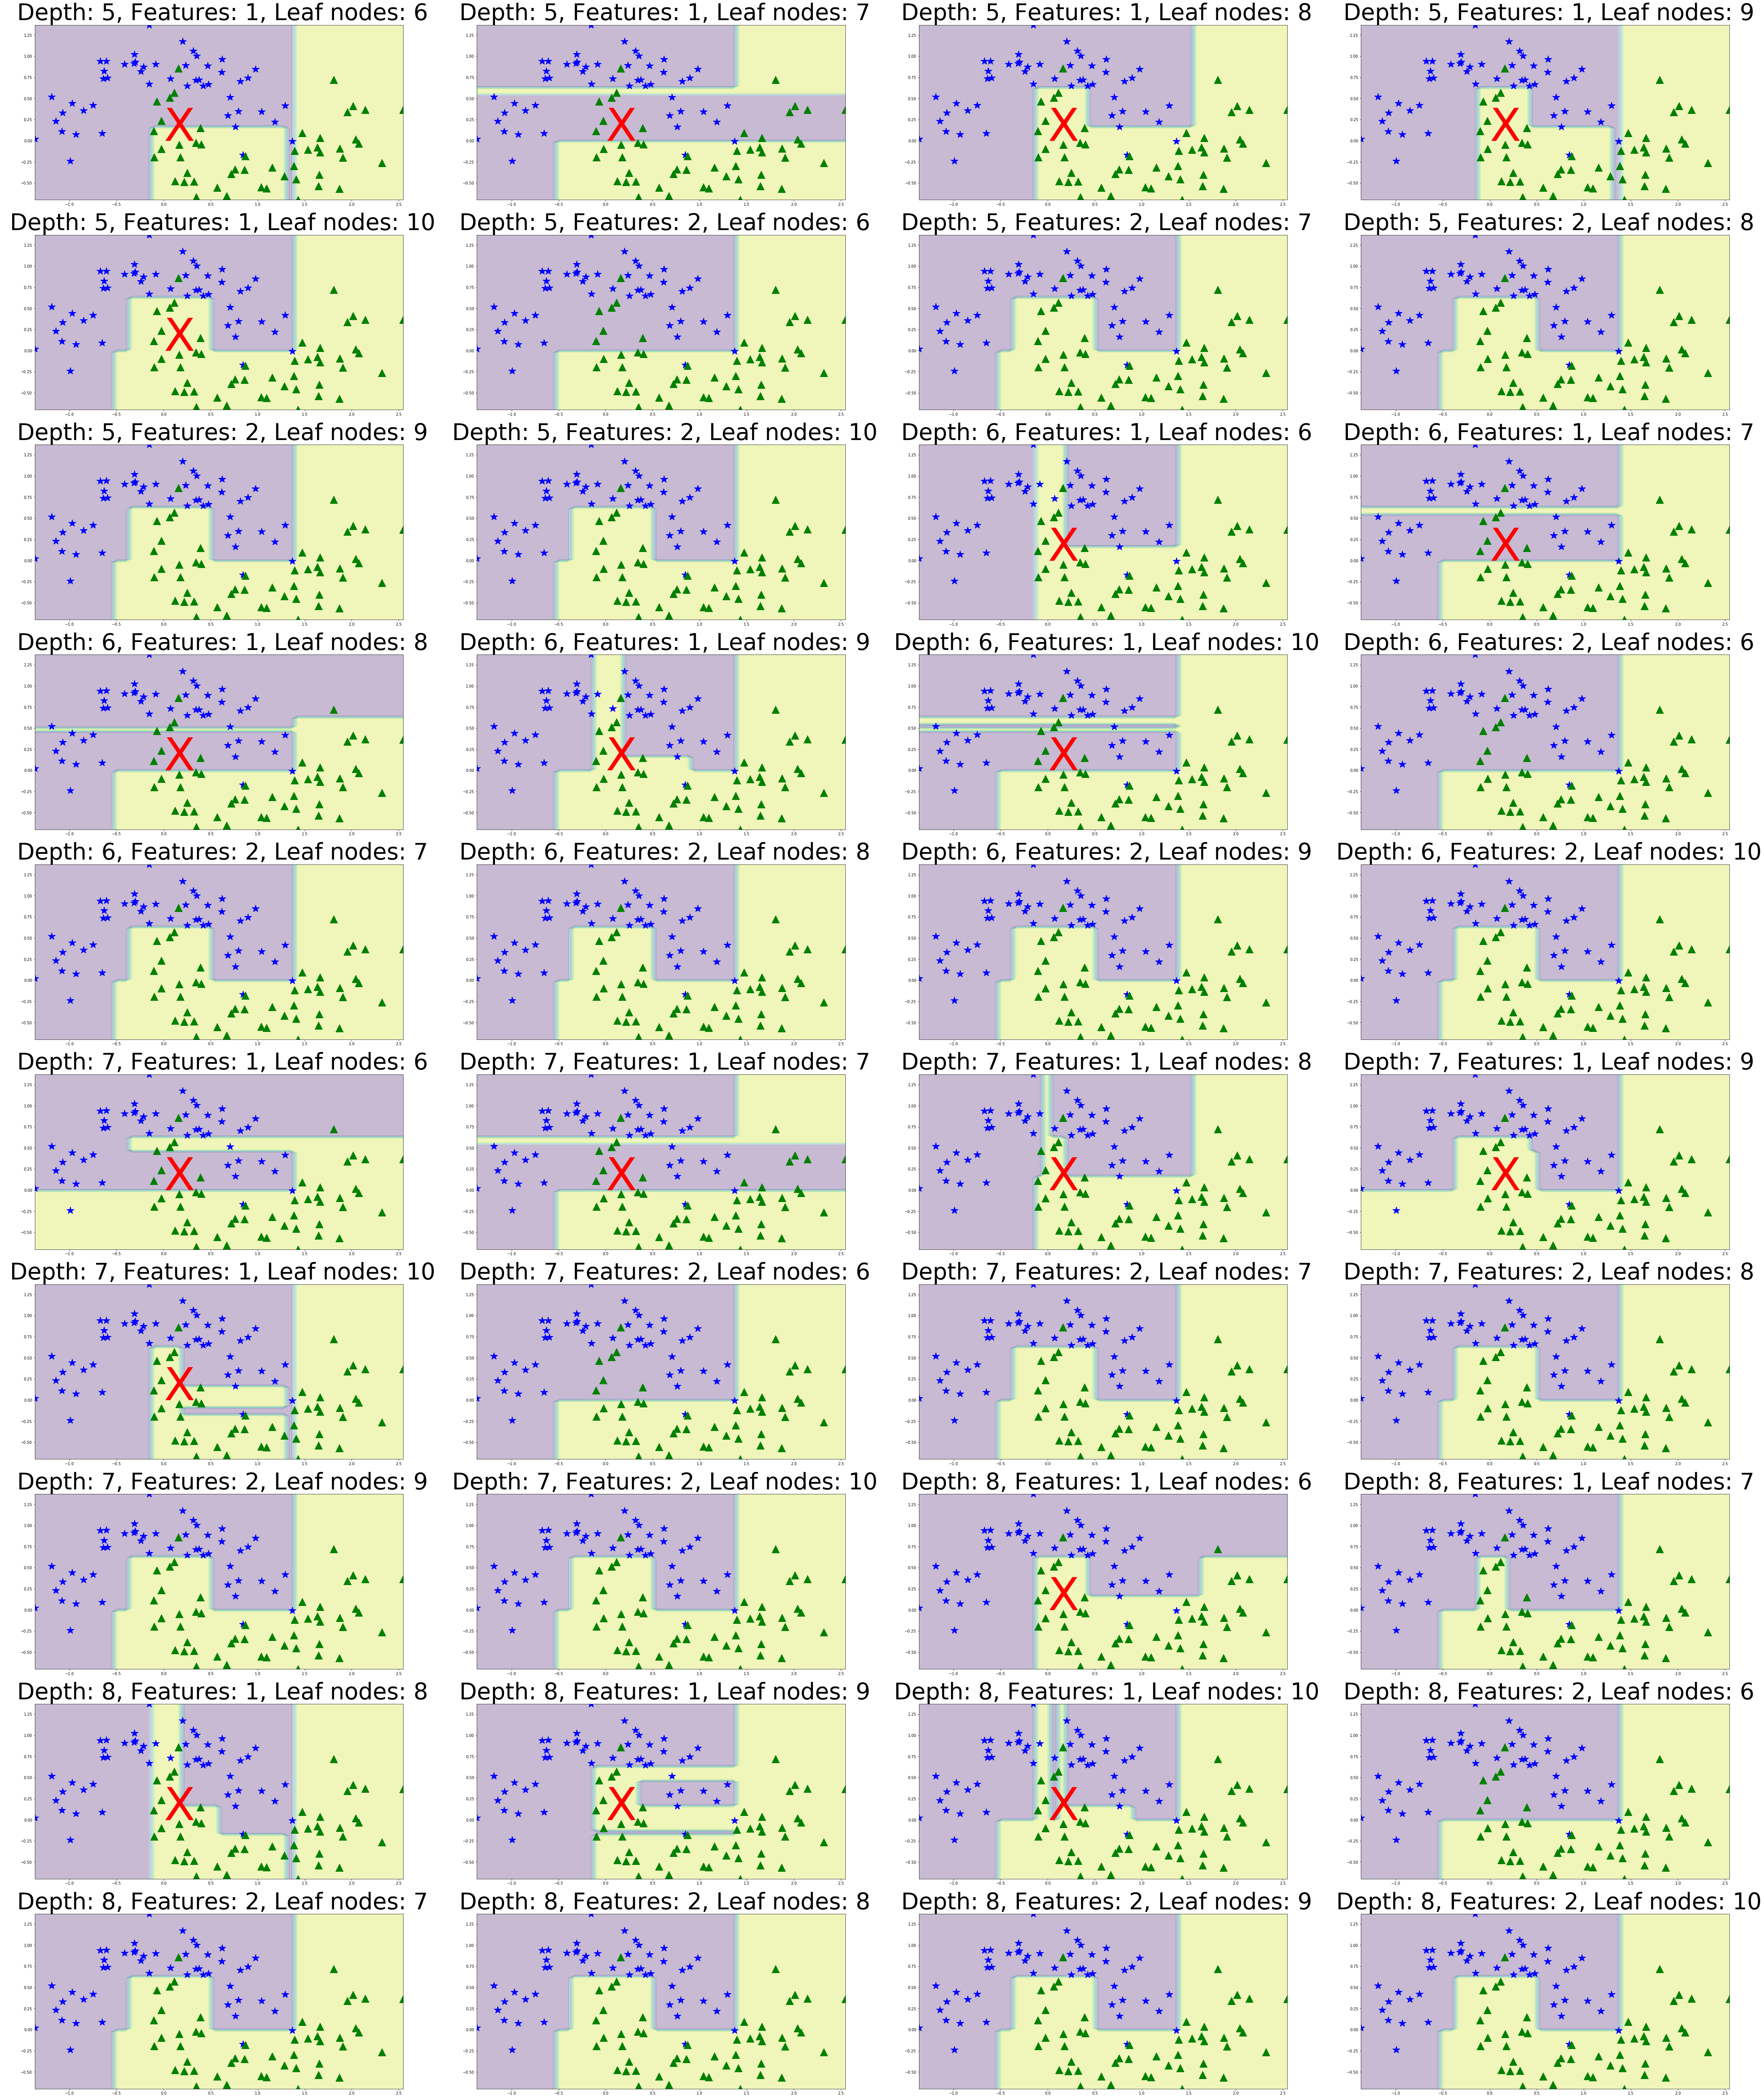

In [98]:
fig = plt.figure(figsize = (80, 100))

i = 1

for depth in [5, 6, 7, 8]:
    for features in [1, 2]:
        for leaf_nodes in [6, 7, 8, 9, 10]:
            tree_clf = DecisionTreeClassifier(max_depth = depth,
                                             max_features = features,
                                             max_leaf_nodes = leaf_nodes)
            tree_clf.fit(Xm, ym)
            
            axs = fig.add_subplot(10, 4, i)
            
            axs.set_title(' Depth: {}, Features: {}, Leaf nodes: {}'.format(depth, features, leaf_nodes), fontsize = 60)
            axs.plot(Xm[:, 0][ym == 0], Xm[:, 1][ym == 0], 'b*', markersize = 20)
            axs.plot(Xm[:, 0][ym == 1], Xm[:, 1][ym == 1], 'g^', markersize = 20)
            
            plot_decision_boundary(axs, tree_clf)
            
            if i in [1, 2, 3, 4, 5, 11, 12, 13, 14, 15, 21, 22, 23, 24, 25, 31, 33, 34, 35]:
                axs.text(0, 0, 'X', fontsize = 120, color = 'red')
                
            i += 1

In [83]:
tree_clf = DecisionTreeClassifier()

param = {
    'max_depth': [5, 6, 7, 8], 'max_features': [1, 2], 'max_leaf_nodes': [6, 7, 8, 9, 10]
}

In [84]:
grid_model = GridSearchCV(
    tree_clf,
    cv = 5,
    param_grid = param,
    scoring = 'accuracy'
)

In [85]:
grid_model.fit(Xm, ym)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [5, 6, 7, 8], 'max_features': [1, 2],
  

In [118]:
for params, score in zip(grid_model.cv_results_['params'], grid_model.cv_results_['mean_test_score']):
    print('Parameteres : ', params, '\tScore : ', score.round(3))

Parameteres :  {'max_depth': 5, 'max_features': 1, 'max_leaf_nodes': 6} 	Score :  0.88
Parameteres :  {'max_depth': 5, 'max_features': 1, 'max_leaf_nodes': 7} 	Score :  0.86
Parameteres :  {'max_depth': 5, 'max_features': 1, 'max_leaf_nodes': 8} 	Score :  0.87
Parameteres :  {'max_depth': 5, 'max_features': 1, 'max_leaf_nodes': 9} 	Score :  0.83
Parameteres :  {'max_depth': 5, 'max_features': 1, 'max_leaf_nodes': 10} 	Score :  0.87
Parameteres :  {'max_depth': 5, 'max_features': 2, 'max_leaf_nodes': 6} 	Score :  0.91
Parameteres :  {'max_depth': 5, 'max_features': 2, 'max_leaf_nodes': 7} 	Score :  0.91
Parameteres :  {'max_depth': 5, 'max_features': 2, 'max_leaf_nodes': 8} 	Score :  0.9
Parameteres :  {'max_depth': 5, 'max_features': 2, 'max_leaf_nodes': 9} 	Score :  0.9
Parameteres :  {'max_depth': 5, 'max_features': 2, 'max_leaf_nodes': 10} 	Score :  0.91
Parameteres :  {'max_depth': 6, 'max_features': 1, 'max_leaf_nodes': 6} 	Score :  0.91
Parameteres :  {'max_depth': 6, 'max_featur

In [120]:
print('Parameters : ', grid_model.best_params_, '\nScore : ', grid_model.best_score_.round(2))

Parameters :  {'max_depth': 7, 'max_features': 1, 'max_leaf_nodes': 7} 
Score :  0.94
